MMQ QUADRÁTICO


In [ ]:
# dengue = pd.read_excel(
#     'dados/dengue.xlsx')
# dengue
import pandas as pd
url='https://docs.google.com/spreadsheets/d/1sgYnJ4U4R0BABUvv8c-aCHp55czW1eE0/edit?usp=sharing&ouid=113661561936415130019&rtpof=true&sd=true'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
dengue = pd.read_excel(url)

# mostre as primeiras 10 linhas de dados
dengue.head(10)

,ano,bimestre,inicio_liraa,final_liraa,habitantes_area,notificacoes_total,notificacoes_15_dias,notificacoes_30_dias_apos,notificacoes_60_dias_apos,notificacoes_mes1,...,ima,imh,area_km2_total,área_ocupada,densid_dem_total,densidade_dem_area_ocupada,temperatura media 15 dias simepar,temperatura media bimestre simepar,"temp satélite 4,6KM Pixel bimestre",temp_area_ocupada satélite 30m pixel bimestre
0,2017,1,2017-01-09,2017-01-16,257131,275,79,132,288,152,...,NaN,NaN,113.616,69.215,2263.2,3714.96063,27.6,26.5,26.174026,36.453541
1,2017,2,2017-03-06,2017-03-10,257131,292,79,155,270,168,...,NaN,NaN,113.616,69.215,2263.2,3714.96063,27.1,23.6,22.927922,29.221665
2,2017,3,2017-05-02,2017-05-09,257131,168,57,86,149,119,...,NaN,NaN,113.616,69.215,2263.2,3714.96063,18.9,18.5,18.767857,29.105457
3,2017,4,2017-07-03,2017-07-07,257131,193,38,83,223,65,...,NaN,NaN,113.616,69.215,2263.2,3714.96063,18.0,17.8,18.853896,27.993881
4,2017,5,2017-09-12,2017-09-15,257131,328,76,177,347,178,...,NaN,NaN,113.616,69.215,2263.2,3714.96063,23.5,22.1,22.932468,41.271918
5,2017,6,2017-11-06,2017-11-13,257131,355,95,190,349,190,...,NaN,NaN,113.616,69.215,2263.2,3714.96063,21.9,23.9,24.550000,41.353294
6,2018,1,2018-01-03,2018-01-08,257131,291,89,161,302,185,...,NaN,NaN,113.616,69.215,2263.2,3714.96063,25.1,24.8,26.339935,43.160214
7,2018,2,2018-03-05,2018-03-08,257131,448,86,234,467,170,...,NaN,NaN,113.616,69.215,2263.2,3714.96063,24.4,24.2,24.074026,34.044148
8,2018,3,2018-05-07,2018-05-10,257131,235,105,73,185,148,...,NaN,NaN,113.616,69.215,2263.2,3714.96063,23.0,17.3,18.231818,27.061570
9,2018,4,2018-07-03,2018-07-06,257131,137,55,59,104,92,...,NaN,NaN,113.616,69.215,2263.2,3714.96063,18.5,15.7,15.942857,23.035675


In [ ]:
casos_2017_2020 = list(dengue.loc[:23, "notificacoes_total"])

bimestres_2017_2020 = [list(range(1,25))]

print(bimestres_2017_2020)
print(casos_2017_2020)

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[275, 292, 168, 193, 328, 355, 291, 448, 235, 137, 155, 264, 451, 2281, 3510, 525, 718, 988, 7807, 11000, 1469, 455, 820, 1759]


In [ ]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings  # esse import apenas serve para esconder avisos que o python acaba fazendo e poluindo o terminal
warnings.simplefilter(action='ignore', category=FutureWarning)

# Dados inicias

bimestres_2017_2020
casos_2017_2020

# A partir daqui vamos criar a tabela com as informações que precisamos para usar o método de mínimos quadrados

a = [17,18,19,20,21]
c = []
for i in a:
  c.append(f'jan-fev-20{i}')
  c.append(f'mar-abr-20{i}')
  c.append(f'maio-jun-20{i}')
  c.append(f'jul-ago-20{i}')
  c.append(f'set-out-20{i}')
  c.append(f'nov-dez-20{i}')

print(c[24:])

tabela = pd.DataFrame(bimestres_2017_2020, columns=c[:24])


# linha xi da tabela

tabela.index = ['xi'] # linha com os valores dos bimestres (de 1 a 24) da tabela
tabela.loc[len(tabela)] = casos_2017_2020
tabela.rename(index= {1:'f(xi)'}, inplace=True) # linha com os valores das vendas (nosso f(xi)) da tabela

# linha xi² da tabela

xi_2 = tabela.apply(
    lambda col: col['xi']**2, axis=0)

tabela = tabela.append(pd.Series(xi_2, index=tabela.columns, name='xi²'))

# linha xi³ da tabela

xi_3 = tabela.apply(
    lambda col: col['xi']**3, axis=0)

tabela = tabela.append(pd.Series(xi_3, index=tabela.columns, name='xi³'))

# linha xi⁴ da tabela

xi_4 = tabela.apply(
    lambda col: col['xi']**4, axis=0)

tabela = tabela.append(pd.Series(xi_4, index=tabela.columns, name='xi^4'))

# linha xi.f(xi) da tabela

xi_fxi = tabela.apply(
    lambda col: col['xi']*col['f(xi)'], axis=0)

tabela = tabela.append(pd.Series(xi_fxi, index=tabela.columns, name='xi.f(xi)'))

# linha xi².f(xi) da tabela

xi2_fxi = tabela.apply(
    lambda col: (col['xi']**2)*(col['f(xi)']), axis=0)

tabela = tabela.append(pd.Series(xi2_fxi, index=tabela.columns, name='xi².f(xi)'))

# coluna correspondente ao somatorio de cada linha da tabela

tabela["Somatorio"] = tabela.apply(
    lambda row: sum(row), axis=1)

print("Tabela:")
display(tabela)

# Com as informações da tabela, conseguimos construir nossa matriz 3x3 para resolução de mínimos quadrados quadrática

A = [[len(tabela.columns)-1, tabela.loc["xi","Somatorio"], tabela.loc["xi²","Somatorio"]],
     [tabela.loc["xi","Somatorio"],tabela.loc["xi²","Somatorio"], tabela.loc["xi³","Somatorio"]],
     [tabela.loc["xi²","Somatorio"],tabela.loc["xi³","Somatorio"], tabela.loc["xi^4","Somatorio"]]]

b = [tabela.loc["f(xi)","Somatorio"],tabela.loc["xi.f(xi)","Somatorio"], tabela.loc["xi².f(xi)","Somatorio"]]

print("\nMatriz A 3x3")
print(A)
print("\nMatriz b")
print(b)

# (a) Método de Gauss

soluçao = np.linalg.solve(A,b)

# Solução:
sol = [soluçao[0], soluçao[1], soluçao[2]]

print("\nSolução encontrada pelo Método de Gauss:")
print(f"a0 = {sol[0]} \na1 = {sol[1]} \na2 = {sol[2]}")

# (b) Equação da curva de ajuste a um Polinômio de grau 2

def g(x):
  return sol[0] + sol[1]*x + sol[2]*(x**2)

print("\nEquação da curva de ajuste a um Polinômio de grau 2:")
print(f"g(x) = {sol[0]} + {sol[1]} x {sol[2]} x²")

# # Tabela 2: Casos de Dengue 2017-2020

# Demanda prevista pelo MMQ em 2017:
mmq_2017_2020 = [g(x) for x in range(1,25)]

tabela2 = pd.DataFrame([mmq_2017_2020], columns=c[:24])

# linha Casos
tabela2.index = ['MMQ 2017-2020']

# linha MMQ(2017-2020)
tabela2 = tabela2.append(pd.Series(casos_2017_2020, index=tabela2.columns, name='Dados 2017-2020'))

# (c) Cálculo do Índice Sazonal Mensal  ϵi

e = []
for i in range(24):
  e.append(casos_2017_2020[i] / mmq_2017_2020[i])

# Demanda prevista pelo MMQ em 2023:
mmq_2021 = [g(x) for x in range(25, 31)]
print(mmq_2021)

# tabela2 = pd.DataFrame([mmq_2021], columns=c[24:])

# linha Vendas
# tabela2.index = ['Casos']

# linha MMQ(2022)
# tabela2 = tabela2.append(pd.Series(list(dengue.loc[24:, "notificacoes_total"]), index=tabela2.columns, name='2021'))

# # linha ϵi
tabela2 = tabela2.append(pd.Series(e, index=tabela2.columns, name='ei'))

# # linha MMQ(2023)
# tabela2 = tabela2.append(pd.Series(mmq_23, index=tabela2.columns, name='MMQ(2023)'))

# # (d) Multiplicando cada Índice Sazonal Mensal  ϵi  pelo valor encontrado pelo MMQ nos meses de 2023
# mmq_2021_e = []
# for i in range(24):
#   mmq_2021_e.append(mmq_2021[i] * e[i])

# linha MMQ(2023) * ϵi
# tabela2 = tabela2.append(pd.Series(mmq_23_e, index=tabela2.columns, name='MMQ(2023) * ϵi'))

# print("\nTabela 2: Laticínios vendidos (2023):")
display(tabela2.T)

e_jan_fev = []
for i in range(6):
  e_jan_fev.append(tabela2.loc[6*i, 'ei'])
print(e_jan_fev)

['jan-fev-2021', 'mar-abr-2021', 'maio-jun-2021', 'jul-ago-2021', 'set-out-2021', 'nov-dez-2021']
Tabela:


,jan-fev-2017,mar-abr-2017,maio-jun-2017,jul-ago-2017,set-out-2017,nov-dez-2017,jan-fev-2018,mar-abr-2018,maio-jun-2018,jul-ago-2018,...,jul-ago-2019,set-out-2019,nov-dez-2019,jan-fev-2020,mar-abr-2020,maio-jun-2020,jul-ago-2020,set-out-2020,nov-dez-2020,Somatorio
xi,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,300
f(xi),275,292,168,193,328,355,291,448,235,137,...,525,718,988,7807,11000,1469,455,820,1759,34924
xi²,1,4,9,16,25,36,49,64,81,100,...,256,289,324,361,400,441,484,529,576,4900
xi³,1,8,27,64,125,216,343,512,729,1000,...,4096,4913,5832,6859,8000,9261,10648,12167,13824,90000
xi^4,1,16,81,256,625,1296,2401,4096,6561,10000,...,65536,83521,104976,130321,160000,194481,234256,279841,331776,1763020
xi.f(xi),275,584,504,772,1640,2130,2037,3584,2115,1370,...,8400,12206,17784,148333,220000,30849,10010,18860,42216,618989
xi².f(xi),275,1168,1512,3088,8200,12780,14259,28672,19035,13700,...,134400,207502,320112,2818327,4400000,647829,220220,433780,1013184,11667859



Matriz A 3x3
[[24, 300, 4900], [300, 4900, 90000], [4900, 90000, 1763020]]

Matriz b
[34924, 618989, 11667859]

Solução encontrada pelo Método de Gauss:
a0 = -585.7529644268801 
a1 = 172.00115232593544 
a2 = -0.5343417452113287

Equação da curva de ajuste a um Polinômio de grau 2:
g(x) = -585.7529644268801 + 172.00115232593544 x -0.5343417452113287 x²
[3380.312252964425, 3525.0619762845827, 3668.743016114318, 3811.3553724536305, 3952.8990453025203, 4093.3740346609875]


,MMQ 2017-2020,Dados 2017-2020,ei
jan-fev-2017,-414.286154,275.0,-0.663792
mar-abr-2017,-243.888027,292.0,-1.197271
maio-jun-2017,-74.558583,168.0,-2.253262
jul-ago-2017,93.702177,193.0,2.059717
set-out-2017,260.894254,328.0,1.257214
nov-dez-2017,427.017647,355.0,0.831347
jan-fev-2018,592.072356,291.0,0.491494
mar-abr-2018,756.058382,448.0,0.592547
maio-jun-2018,918.975725,235.0,0.255719
jul-ago-2018,1080.824384,137.0,0.126755


KeyError: ignored

MMQ LINEAR

In [ ]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings  # esse import apenas serve para esconder avisos que o python acaba fazendo e poluindo o terminal
warnings.simplefilter(action='ignore', category=FutureWarning)

# Dados inicias

bimestres_2017_2020
casos_2017_2020

# A partir daqui vamos criar a tabela com as informações que precisamos para usar o método de mínimos quadrados

a = [17,18,19,20]
c = []
for i in a:
  c.append(f'jan-fev-20{i}')
  c.append(f'mar-abr-20{i}')
  c.append(f'maio-jun-20{i}')
  c.append(f'jul-ago-20{i}')
  c.append(f'set-out-20{i}')
  c.append(f'nov-dez-20{i}')

tabela = pd.DataFrame(bimestres_2017_2020, columns=c)


# linha xi da tabela

tabela.index = ['xi'] # linha com os valores dos bimestres (de 1 a 24) da tabela
tabela.loc[len(tabela)] = casos_2017_2020
tabela.rename(index= {1:'f(xi)'}, inplace=True) # linha com os valores das vendas (nosso f(xi)) da tabela

# linha xi² da tabela

xi_2 = tabela.apply(
    lambda col: col['xi']**2, axis=0)

tabela = tabela.append(pd.Series(xi_2, index=tabela.columns, name='xi²'))

# linha xi.f(xi) da tabela

xi_fxi = tabela.apply(
    lambda col: col['xi']*col['f(xi)'], axis=0)

tabela = tabela.append(pd.Series(xi_fxi, index=tabela.columns, name='xi.f(xi)'))

# coluna correspondente ao somatorio de cada linha da tabela

tabela["Somatorio"] = tabela.apply(
    lambda row: sum(row), axis=1)

print("Tabela:")
display(tabela)

# Com as informações da tabela, conseguimos construir nossa matriz 3x3 para resolução de mínimos quadrados quadrática

A = [[len(tabela.columns)-1, tabela.loc["xi","Somatorio"]],
     [tabela.loc["xi","Somatorio"],tabela.loc["xi²","Somatorio"]]]

b = [tabela.loc["f(xi)","Somatorio"],tabela.loc["xi.f(xi)","Somatorio"]]

print("\nMatriz A 3x3")
print(A)
print("\nMatriz b")
print(b)

# (a) Método de Gauss

soluçao = np.linalg.solve(A,b)

# Solução:
sol = [soluçao[0], soluçao[1]]

print("\nSolução encontrada pelo Método de Gauss:")
print(f"a0 = {sol[0]} \na1 = {sol[1]}")

# (b) Equação da curva de ajuste a um Polinômio de grau 2

def g(x):
  return sol[0] + sol[1]*x

print("\nEquação da curva de ajuste a um Polinômio de grau 2:")
print(f"g(x) = {sol[0]} + {sol[1]} x")

# Demanda prevista pelo MMQ em 2017:
mmq_2017_2020 = [g(x) for x in range(1,25)]

# (c) Cálculo do Índice Sazonal Mensal  ϵi
e = []
for i in range(24):
  e.append(casos_2017_2020[i] / mmq_2017_2020[i])

# Tabela 2: Casos de Dengue

tabela2 = pd.DataFrame([casos_2017_2020], columns=c)

# linha Vendas
tabela2.index = ['Casos']

# linha MMQ(2022)
tabela2 = tabela2.append(pd.Series(mmq_2017_2020, index=tabela2.columns, name='MMQ(2017-2020)'))

# linha ϵi
tabela2 = tabela2.append(pd.Series(e, index=tabela2.columns, name='ϵi'))

# Demanda prevista pelo MMQ em 2023:
mmq_2021 = [g(x) for x in range(25, 31)]
print(mmq_2021)
# # linha MMQ(2023)
# tabela2 = tabela2.append(pd.Series(mmq_23, index=tabela2.columns, name='MMQ(2023)'))

# (d) Multiplicando cada Índice Sazonal Mensal  ϵi  pelo valor encontrado pelo MMQ nos meses de 2023
mmq_2021_e = []
for i in range(6):
  mmq_2021_e.append(mmq_2021[i] * e[i])


print(mmq_2021_e)
print(list(dengue.loc[24:, "notificacoes_total"]))
# mmq_2017_2020_e = []
# for i in range(24):
#   mmq_2017_2020_e.append(mmq_2017_2020[i] * e[i])

# # linha MMQ(2023) * ϵi
# tabela2 = tabela2.append(pd.Series(mmq_23_e, index=tabela2.columns, name='MMQ(2023) * ϵi'))

print("\nTabela 2: Laticínios vendidos (2023):")
display(tabela2)



Tabela:


,jan-fev-2017,mar-abr-2017,maio-jun-2017,jul-ago-2017,set-out-2017,nov-dez-2017,jan-fev-2018,mar-abr-2018,maio-jun-2018,jul-ago-2018,...,jul-ago-2019,set-out-2019,nov-dez-2019,jan-fev-2020,mar-abr-2020,maio-jun-2020,jul-ago-2020,set-out-2020,nov-dez-2020,Somatorio
xi,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,300
f(xi),275,292,168,193,328,355,291,448,235,137,...,525,718,988,7807,11000,1469,455,820,1759,34924
xi²,1,4,9,16,25,36,49,64,81,100,...,256,289,324,361,400,441,484,529,576,4900
xi.f(xi),275,584,504,772,1640,2130,2037,3584,2115,1370,...,8400,12206,17784,148333,220000,30849,10010,18860,42216,618989



Matriz A 3x3
[[24, 300], [300, 4900]]

Matriz b
[34924, 618989]

Solução encontrada pelo Método de Gauss:
a0 = -527.865942028986 
a1 = 158.6426086956522

Equação da curva de ajuste a um Polinômio de grau 2:
g(x) = -527.865942028986 + 158.6426086956522 x
[3438.199275362319, 3596.8418840579716, 3755.4844927536233, 3914.127101449276, 4072.7697101449276, 4231.41231884058]
[-2560.793740169825, -4987.530705633206, -12147.560290535193, 7079.613154845927, 5034.4189087850555, 3542.8958232852956]
[2455, 2725, 1166, 573, 991, 830]

Tabela 2: Laticínios vendidos (2023):


,jan-fev-2017,mar-abr-2017,maio-jun-2017,jul-ago-2017,set-out-2017,nov-dez-2017,jan-fev-2018,mar-abr-2018,maio-jun-2018,jul-ago-2018,...,maio-jun-2019,jul-ago-2019,set-out-2019,nov-dez-2019,jan-fev-2020,mar-abr-2020,maio-jun-2020,jul-ago-2020,set-out-2020,nov-dez-2020
Casos,275.000000,292.000000,168.000000,193.000000,328.000000,355.000000,291.000000,448.000000,235.000000,137.000000,...,3510.000000,525.000000,718.000000,988.000000,7807.000000,11000.000000,1469.000000,455.000000,820.000000,1759.000000
MMQ(2017-2020),-369.223333,-210.580725,-51.938116,106.704493,265.347101,423.989710,582.632319,741.274928,899.917536,1058.560145,...,1851.773188,2010.415797,2169.058406,2327.701014,2486.343623,2644.986232,2803.628841,2962.271449,3120.914058,3279.556667
ϵi,-0.744807,-1.386642,-3.234619,1.808734,1.236117,0.837284,0.499457,0.604364,0.261135,0.129421,...,1.895481,0.261140,0.331019,0.424453,3.139952,4.158812,0.523964,0.153598,0.262744,0.536353


from matplotlib import pyplot as plt
tabela['jan-fev-2017'].plot(kind='hist', bins=20, title='jan-fev-2017')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela['mar-abr-2017'].plot(kind='hist', bins=20, title='mar-abr-2017')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela['maio-jun-2017'].plot(kind='hist', bins=20, title='maio-jun-2017')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela['jul-ago-2017'].plot(kind='hist', bins=20, title='jul-ago-2017')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela.plot(kind='scatter', x='jan-fev-2017', y='mar-abr-2017', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela.plot(kind='scatter', x='mar-abr-2017', y='maio-jun-2017', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela.plot(kind='scatter', x='maio-jun-2017', y='jul-ago-2017', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela.plot(kind='scatter', x='jul-ago-2017', y='set-out-2017', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['jul-ago-2020']
  ys = series['jan-fev-2017']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = tabela.sort_values('jul-ago-2020', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('jul-ago-2020')
_ = plt.ylabel('jan-fev-2017')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['jul-ago-2020']
  ys = series['mar-abr-2017']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = tabela.sort_values('jul-ago-2020', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('jul-ago-2020')
_ = plt.ylabel('mar-abr-2017')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['jul-ago-2020']
  ys = series['maio-jun-2017']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = tabela.sort_values('jul-ago-2020', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('jul-ago-2020')
_ = plt.ylabel('maio-jun-2017')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['jul-ago-2020']
  ys = series['jul-ago-2017']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = tabela.sort_values('jul-ago-2020', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('jul-ago-2020')
_ = plt.ylabel('jul-ago-2017')

from matplotlib import pyplot as plt
tabela['jan-fev-2017'].plot(kind='line', figsize=(8, 4), title='jan-fev-2017')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
tabela['mar-abr-2017'].plot(kind='line', figsize=(8, 4), title='mar-abr-2017')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
tabela['maio-jun-2017'].plot(kind='line', figsize=(8, 4), title='maio-jun-2017')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
tabela['jul-ago-2017'].plot(kind='line', figsize=(8, 4), title='jul-ago-2017')
plt.gca().spines[['top', 'right']].set_visible(False)

Calculando MMQ de cada bimestre

In [ ]:
casos_jan_fev = []
casos_mar_abril = []
casos_maio_jun = []
casos_jul_agst = []
casos_set_out = []
casos_nov_dez = []
media_casos = []
for i in range(4):
  casos_jan_fev.append(dengue.loc[6*i, "notificacoes_total"])
  casos_mar_abril.append(dengue.loc[6*i+1, "notificacoes_total"])
  casos_maio_jun.append(dengue.loc[6*i+2, "notificacoes_total"])
  casos_jul_agst.append(dengue.loc[6*i+3, "notificacoes_total"])
  casos_set_out.append(dengue.loc[6*i+4, "notificacoes_total"])
  casos_nov_dez.append(dengue.loc[6*i+5, "notificacoes_total"])

print(casos_jan_fev)
print(casos_mar_abril)
print(casos_maio_jun)
print(casos_jul_agst)
print(casos_set_out)
print(casos_nov_dez)

casos = [casos_jan_fev,casos_mar_abril,casos_maio_jun,casos_jul_agst,casos_set_out,casos_nov_dez]
print(casos)

[275, 291, 451, 7807]
[292, 448, 2281, 11000]
[168, 235, 3510, 1469]
[193, 137, 525, 455]
[328, 155, 718, 820]
[355, 264, 988, 1759]
[[275, 291, 451, 7807], [292, 448, 2281, 11000], [168, 235, 3510, 1469], [193, 137, 525, 455], [328, 155, 718, 820], [355, 264, 988, 1759]]


In [ ]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings  # esse import apenas serve para esconder avisos que o python acaba fazendo e poluindo o terminal
warnings.simplefilter(action='ignore', category=FutureWarning)
import statistics

xi = [[1,2,3,4]]

tabela_jan_fev = pd.DataFrame(xi, index=['xi'], columns=['2017','2018','2019','2020'])

# linha xi da tabela

tabela_jan_fev.loc[len(tabela_jan_fev)] = casos_jan_fev
tabela_jan_fev.rename(index= {1:'f(xi)'}, inplace=True) # linha com os valores das vendas (nosso f(xi)) da tabela

# tabela1["Média"] = tabela1.apply(lambda row: int(statistics.mean(row)), axis=1)

# # linha xi² da tabela

xi_2 = tabela_jan_fev.apply(
    lambda col: col['xi']**2, axis=0)

tabela_jan_fev = tabela_jan_fev.append(pd.Series(xi_2, index=tabela_jan_fev.columns, name='xi²'))

# # linha xi.f(xi) da tabela

xi_fxi = tabela_jan_fev.apply(
    lambda col: col['xi']*col['f(xi)'], axis=0)

tabela_jan_fev = tabela_jan_fev.append(pd.Series(xi_fxi, index=tabela_jan_fev.columns, name='xi.f(xi)'))

# # coluna correspondente ao somatorio de cada linha da tabela

tabela_jan_fev["Somatorio"] = tabela_jan_fev.apply(
    lambda row: sum(row), axis=1)

print("Tabela:")
display(tabela_jan_fev)

# Com as informações da tabela, conseguimos construir nossa matriz 3x3 para resolução de mínimos quadrados quadrática

A_jan_fev = [[len(tabela_jan_fev.columns)-1, tabela_jan_fev.loc["xi","Somatorio"]],
     [tabela_jan_fev.loc["xi","Somatorio"],tabela_jan_fev.loc["xi²","Somatorio"]]]

b_jan_fev = [tabela_jan_fev.loc["f(xi)","Somatorio"],tabela_jan_fev.loc["xi.f(xi)","Somatorio"]]

print("\nMatriz A 3x3")
print(A_jan_fev)
print("\nMatriz b")
print(b_jan_fev)

# (a) Método de Gauss

soluçao = np.linalg.solve(A_jan_fev,b_jan_fev)

# Solução:
sol = [soluçao[0], soluçao[1]]

print("\nSolução encontrada pelo Método de Gauss:")
print(f"a0 = {sol[0]} \na1 = {sol[1]}")

# (b) Equação da curva de ajuste a um Polinômio de grau 2

def g(x):
  return sol[0] + sol[1]*x

print("\nEquação da curva de ajuste a um Polinômio de grau 2:")
print(f"g(x) = {sol[0]} + {sol[1]} x")

# Demanda prevista pelo MMQ em 2017:
mmq_jan_fev_2017_2020 = [g(x) for x in range(1,5)]

# Tabela 2: Casos de Dengue

tabela2_jan_fev = pd.DataFrame([casos_jan_fev], columns=['2017','2018','2019','2020'])

# linha Vendas
tabela2_jan_fev.index = ['Dados jan-fev']

# linha MMQ(2022)
tabela2_jan_fev = tabela2_jan_fev.append(pd.Series(mmq_jan_fev_2017_2020, index=tabela2_jan_fev.columns, name='MMQ jan-fev'))

# Demanda prevista pelo MMQ em 2023:
mmq_jan_fev_2021 = g(5)
print(mmq_jan_fev_2021)

coluna_2021 = [dengue.loc[24, "notificacoes_total"], mmq_jan_fev_2021]

# # linha MMQ(2023) * ϵi
tabela2_jan_fev["2021"] = coluna_2021

print("\nTabela 2: Casos de dengue:")
display(tabela2_jan_fev)


Tabela:


,2017,2018,2019,2020,Somatorio
xi,1,2,3,4,10
f(xi),275,291,451,7807,8824
xi²,1,4,9,16,30
xi.f(xi),275,582,1353,31228,33438



Matriz A 3x3
[[4, 10], [10, 30]]

Matriz b
[8824, 33438]

Solução encontrada pelo Método de Gauss:
a0 = -3483.0000000000014 
a1 = 2275.6000000000004

Equação da curva de ajuste a um Polinômio de grau 2:
g(x) = -3483.0000000000014 + 2275.6000000000004 x
7895.0

Tabela 2: Casos de dengue:


,2017,2018,2019,2020,2021
Dados jan-fev,275.0,291.0,451.0,7807.0,2455.0
MMQ jan-fev,-1207.4,1068.2,3343.8,5619.4,7895.0


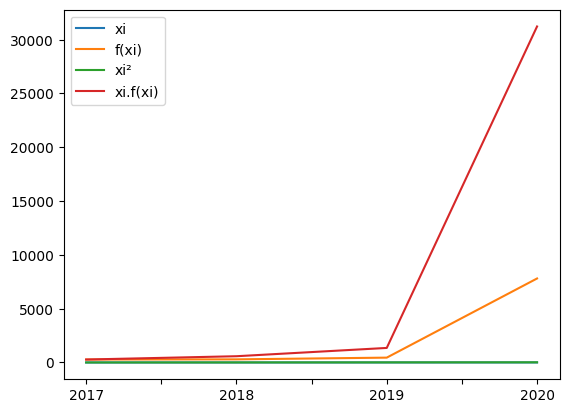

In [ ]:
# prompt: Usando o DataFrame tabela_jan_fev: import matplotlib.pyplot as plt df = tabela2_jan_fev.transpose() df.plot() plt.show()

import matplotlib.pyplot as plt

df = tabela_jan_fev.transpose()
df.plot()
plt.show()


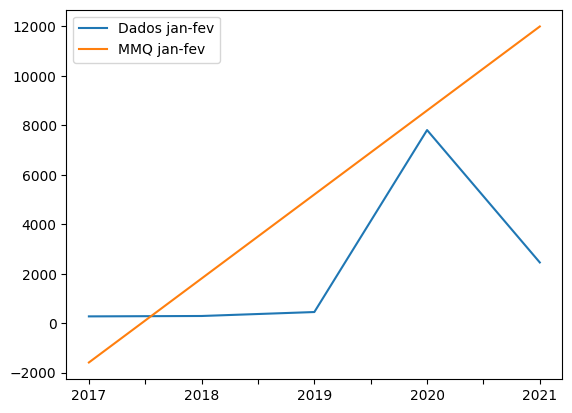

In [ ]:
# prompt: Usando o DataFrame tabela2_jan_fev: grafico que melhor se ajusta aos dados, acrescente os anos nas linhas do grafico

import matplotlib.pyplot as plt
df = tabela2_jan_fev.transpose()
df.plot()
plt.show()


In [ ]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings  # esse import apenas serve para esconder avisos que o python acaba fazendo e poluindo o terminal
warnings.simplefilter(action='ignore', category=FutureWarning)
import statistics

xi = [[1,2,3,4]]

tabela_mar_abril = pd.DataFrame(xi, index=['xi'], columns=['2017','2018','2019','2020'])

# linha xi da tabela

tabela_mar_abril.loc[len(tabela_mar_abril)] = casos_mar_abril
tabela_mar_abril.rename(index= {1:'f(xi)'}, inplace=True) # linha com os valores das vendas (nosso f(xi)) da tabela

# tabela1["Média"] = tabela1.apply(lambda row: int(statistics.mean(row)), axis=1)

# # linha xi² da tabela

xi_2 = tabela_mar_abril.apply(
    lambda col: col['xi']**2, axis=0)

tabela_mar_abril = tabela_mar_abril.append(pd.Series(xi_2, index=tabela_mar_abril.columns, name='xi²'))

# # linha xi.f(xi) da tabela

xi_fxi = tabela_mar_abril.apply(
    lambda col: col['xi']*col['f(xi)'], axis=0)

tabela_mar_abril = tabela_mar_abril.append(pd.Series(xi_fxi, index=tabela_mar_abril.columns, name='xi.f(xi)'))

# # coluna correspondente ao somatorio de cada linha da tabela

tabela_mar_abril["Somatorio"] = tabela_mar_abril.apply(
    lambda row: sum(row), axis=1)

print("Tabela:")
display(tabela_mar_abril)

# Com as informações da tabela, conseguimos construir nossa matriz 3x3 para resolução de mínimos quadrados quadrática

A_mar_abril = [[len(tabela_mar_abril.columns)-1, tabela_mar_abril.loc["xi","Somatorio"]],
     [tabela_mar_abril.loc["xi","Somatorio"],tabela_mar_abril.loc["xi²","Somatorio"]]]

b_mar_abril = [tabela_mar_abril.loc["f(xi)","Somatorio"],tabela_mar_abril.loc["xi.f(xi)","Somatorio"]]

print("\nMatriz A 3x3")
print(A_mar_abril)
print("\nMatriz b")
print(b_mar_abril)

# (a) Método de Gauss

soluçao = np.linalg.solve(A_mar_abril,b_mar_abril)

# Solução:
sol = [soluçao[0], soluçao[1]]

print("\nSolução encontrada pelo Método de Gauss:")
print(f"a0 = {sol[0]} \na1 = {sol[1]}")

# (b) Equação da curva de ajuste a um Polinômio de grau 2

def g(x):
  return sol[0] + sol[1]*x

print("\nEquação da curva de ajuste a um Polinômio de grau 2:")
print(f"g(x) = {sol[0]} + {sol[1]} x")

# Demanda prevista pelo MMQ em 2017:
mmq_jan_fev_2017_2020 = [g(x) for x in range(1,5)]

# Tabela 2: Casos de Dengue

tabela2_jan_fev = pd.DataFrame([casos_jan_fev], columns=['2017','2018','2019','2020'])

# linha Vendas
tabela2_jan_fev.index = ['Dados jan-fev']

# linha MMQ(2022)
tabela2_jan_fev = tabela2_jan_fev.append(pd.Series(mmq_jan_fev_2017_2020, index=tabela2_jan_fev.columns, name='MMQ jan-fev'))

# Demanda prevista pelo MMQ em 2023:
mmq_jan_fev_2021 = g(5)
print(mmq_jan_fev_2021)

coluna_2021 = [dengue.loc[24, "notificacoes_total"], mmq_jan_fev_2021]

# # linha MMQ(2023) * ϵi
tabela2_jan_fev["2021"] = coluna_2021

print("\nTabela 2: Casos de dengue:")
display(tabela2_jan_fev)


Tabela:


,2017,2018,2019,2020,Somatorio
xi,1,2,3,4,10
f(xi),292,448,2281,11000,14021
xi²,1,4,9,16,30
xi.f(xi),292,896,6843,44000,52031



Matriz A 3x3
[[4, 10], [10, 30]]

Matriz b
[14021, 52031]

Solução encontrada pelo Método de Gauss:
a0 = -4984.000000000003 
a1 = 3395.7000000000007

Equação da curva de ajuste a um Polinômio de grau 2:
g(x) = -4984.000000000003 + 3395.7000000000007 x
11994.5

Tabela 2: Casos de dengue:


,2017,2018,2019,2020,2021
Dados jan-fev,275.0,291.0,451.0,7807.0,2455.0
MMQ jan-fev,-1588.3,1807.4,5203.1,8598.8,11994.5


from matplotlib import pyplot as plt
tabela2_jan_fev['2017'].plot(kind='hist', bins=20, title='2017')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela2_jan_fev['2018'].plot(kind='hist', bins=20, title='2018')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela2_jan_fev['2019'].plot(kind='hist', bins=20, title='2019')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela2_jan_fev['2020'].plot(kind='hist', bins=20, title='2020')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela2_jan_fev.plot(kind='scatter', x='2017', y='2018', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela2_jan_fev.plot(kind='scatter', x='2018', y='2019', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela2_jan_fev.plot(kind='scatter', x='2019', y='2020', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela2_jan_fev.plot(kind='scatter', x='2020', y='2021', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['2018']
  ys = series['2017']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = tabela2_jan_fev.sort_values('2018', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('2018')
_ = plt.ylabel('2017')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['2018']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': '2018'}, axis=1)
              .sort_values('2018', ascending=True))
  xs = counted['2018']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = tabela2_jan_fev.sort_values('2018', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('2018')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['2019']
  ys = series['2017']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = tabela2_jan_fev.sort_values('2019', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('2019')
_ = plt.ylabel('2017')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['2019']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': '2019'}, axis=1)
              .sort_values('2019', ascending=True))
  xs = counted['2019']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = tabela2_jan_fev.sort_values('2019', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('2019')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
tabela2_jan_fev['2017'].plot(kind='line', figsize=(8, 4), title='2017')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
tabela2_jan_fev['2018'].plot(kind='line', figsize=(8, 4), title='2018')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
tabela2_jan_fev['2019'].plot(kind='line', figsize=(8, 4), title='2019')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
tabela2_jan_fev['2020'].plot(kind='line', figsize=(8, 4), title='2020')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
tabela_mar_abril['2017'].plot(kind='hist', bins=20, title='2017')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela_mar_abril['2018'].plot(kind='hist', bins=20, title='2018')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela_mar_abril['2019'].plot(kind='hist', bins=20, title='2019')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela_mar_abril['2020'].plot(kind='hist', bins=20, title='2020')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela_mar_abril.plot(kind='scatter', x='2017', y='2018', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela_mar_abril.plot(kind='scatter', x='2018', y='2019', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela_mar_abril.plot(kind='scatter', x='2019', y='2020', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela_mar_abril.plot(kind='scatter', x='2020', y='Somatorio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela_mar_abril['2017'].plot(kind='line', figsize=(8, 4), title='2017')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
tabela_mar_abril['2018'].plot(kind='line', figsize=(8, 4), title='2018')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
tabela_mar_abril['2019'].plot(kind='line', figsize=(8, 4), title='2019')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
tabela_mar_abril['2020'].plot(kind='line', figsize=(8, 4), title='2020')
plt.gca().spines[['top', 'right']].set_visible(False)

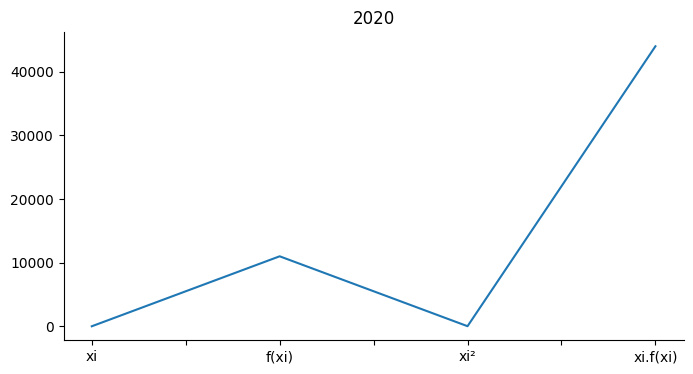

In [ ]:
from matplotlib import pyplot as plt
tabela_mar_abril['2020'].plot(kind='line', figsize=(8, 4), title='2020')
plt.gca().spines[['top', 'right']].set_visible(False)

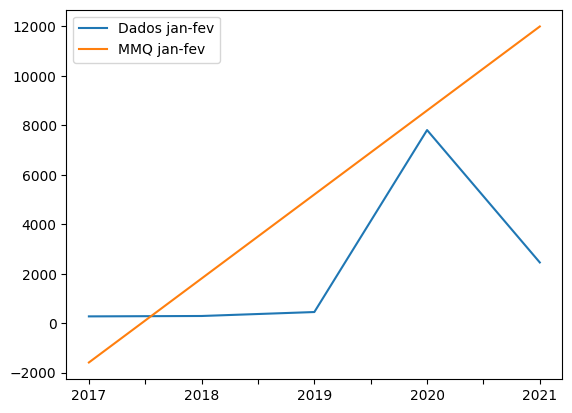

In [ ]:
# prompt: Usando o DataFrame tabela2_jan_fev: import matplotlib.pyplot as plt df = tabela2_jan_fev.transpose() df.plot() plt.show()

import matplotlib.pyplot as plt
df = tabela2_jan_fev.transpose()
df.plot()
plt.show()


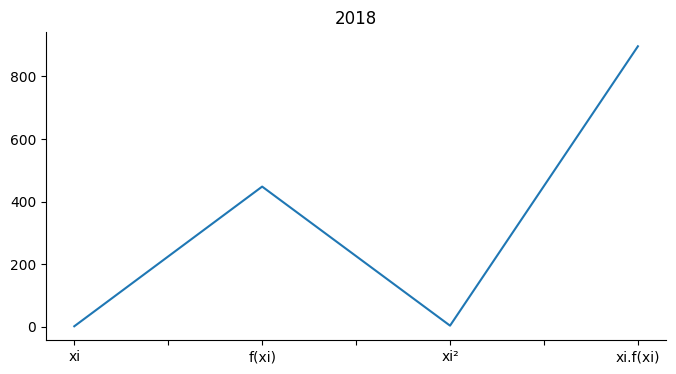

In [ ]:
from matplotlib import pyplot as plt
tabela_mar_abril['2018'].plot(kind='line', figsize=(8, 4), title='2018')
plt.gca().spines[['top', 'right']].set_visible(False)

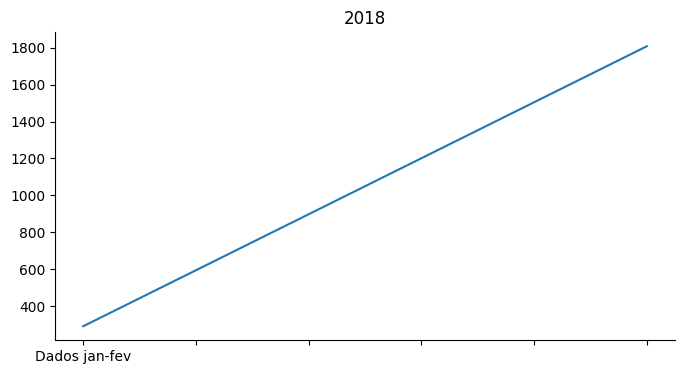

In [ ]:
from matplotlib import pyplot as plt
tabela2_jan_fev['2018'].plot(kind='line', figsize=(8, 4), title='2018')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings  # esse import apenas serve para esconder avisos que o python acaba fazendo e poluindo o terminal
warnings.simplefilter(action='ignore', category=FutureWarning)
import statistics

xi = [[1,2,3,4]]

tabela_jan_fev = pd.DataFrame(xi, index=['xi'], columns=['2017','2018','2019','2020'])

# linha xi da tabela

tabela_jan_fev.loc[len(tabela_jan_fev)] = casos_jan_fev
tabela_jan_fev.rename(index= {1:'f(xi)'}, inplace=True) # linha com os valores das vendas (nosso f(xi)) da tabela

# tabela1["Média"] = tabela1.apply(lambda row: int(statistics.mean(row)), axis=1)

# # linha xi² da tabela

xi_2 = tabela_jan_fev.apply(
    lambda col: col['xi']**2, axis=0)

tabela_jan_fev = tabela_jan_fev.append(pd.Series(xi_2, index=tabela_jan_fev.columns, name='xi²'))

# # linha xi.f(xi) da tabela

xi_fxi = tabela_jan_fev.apply(
    lambda col: col['xi']*col['f(xi)'], axis=0)

tabela_jan_fev = tabela_jan_fev.append(pd.Series(xi_fxi, index=tabela_jan_fev.columns, name='xi.f(xi)'))

display(tabela_jan_fev)

# # coluna correspondente ao somatorio de cada linha da tabela

# tabela["Somatorio"] = tabela.apply(
#     lambda row: sum(row), axis=1)

# print("Tabela:")

# # Com as informações da tabela, conseguimos construir nossa matriz 3x3 para resolução de mínimos quadrados quadrática

# A = [[len(tabela.columns)-1, tabela.loc["xi","Somatorio"]],
#      [tabela.loc["xi","Somatorio"],tabela.loc["xi²","Somatorio"]]]

# b = [tabela.loc["f(xi)","Somatorio"],tabela.loc["xi.f(xi)","Somatorio"]]

# print("\nMatriz A 3x3")
# print(A)
# print("\nMatriz b")
# print(b)

# # (a) Método de Gauss

# soluçao = np.linalg.solve(A,b)

# # Solução:
# sol = [soluçao[0], soluçao[1]]

# print("\nSolução encontrada pelo Método de Gauss:")
# print(f"a0 = {sol[0]} \na1 = {sol[1]}")

# # (b) Equação da curva de ajuste a um Polinômio de grau 2

# def g(x):
#   return sol[0] + sol[1]*x

# print("\nEquação da curva de ajuste a um Polinômio de grau 2:")
# print(f"g(x) = {sol[0]} + {sol[1]} x")


,2017,2018,2019,2020
xi,1,2,3,4
f(xi),275,291,451,7807
xi²,1,4,9,16
xi.f(xi),275,582,1353,31228


from matplotlib import pyplot as plt
tabela_jan_fev['2017'].plot(kind='hist', bins=20, title='2017')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela_jan_fev['2018'].plot(kind='hist', bins=20, title='2018')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela_jan_fev['2019'].plot(kind='hist', bins=20, title='2019')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela_jan_fev['2020'].plot(kind='hist', bins=20, title='2020')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela_jan_fev.plot(kind='scatter', x='2017', y='2018', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela_jan_fev.plot(kind='scatter', x='2018', y='2019', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela_jan_fev.plot(kind='scatter', x='2019', y='2020', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tabela_jan_fev['2017'].plot(kind='line', figsize=(8, 4), title='2017')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
tabela_jan_fev['2018'].plot(kind='line', figsize=(8, 4), title='2018')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
tabela_jan_fev['2019'].plot(kind='line', figsize=(8, 4), title='2019')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
tabela_jan_fev['2020'].plot(kind='line', figsize=(8, 4), title='2020')
plt.gca().spines[['top', 'right']].set_visible(False)